In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets

In [3]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train.ndim

4

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train[0]

array([6], dtype=uint8)

- Now to convert dimension into 1-d array

In [22]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [23]:
y_train.shape

(50000,)

- have to check shape of 1st index image

In [24]:
X_train[0].shape

(32, 32, 3)

In [25]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

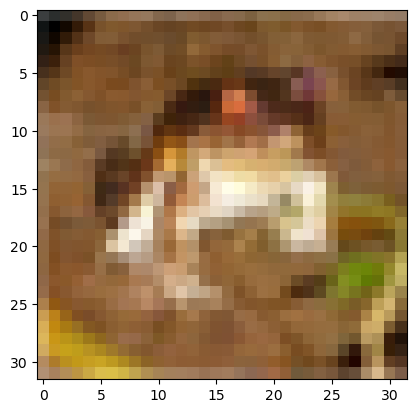

In [26]:
plt.imshow(X_train[0])
plt.show()

In [27]:
y_train[0]

6

- Creating list of categories 

In [28]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
categories[y_train[0]]

'frog'

In [30]:
categories[y_train[10]]

'deer'

In [31]:
def plot_image(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])
    plt.show()

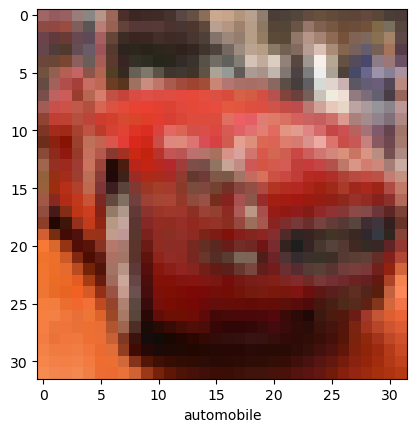

In [32]:
plot_image(X_train, y_train, 5)

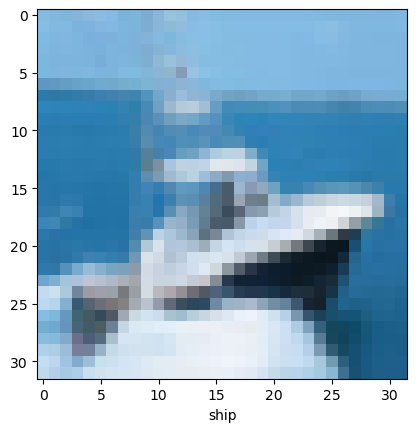

In [33]:
plot_image(X_train, y_train, 8)

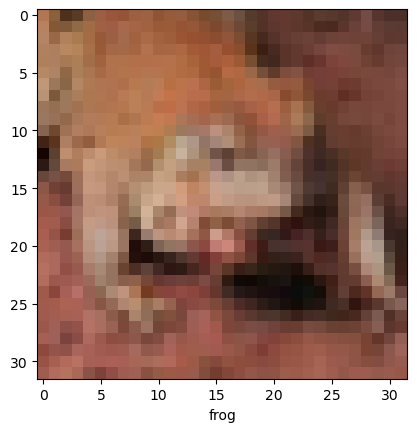

In [34]:
plot_image(X_test, y_test, 5)

- Now we have to scale data

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

- now we create model for as ann

In [37]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

In [38]:
X_train.shape

(50000, 32, 32, 3)

- Reshaping array

In [39]:
X_train.reshape(50000, 3072).shape

(50000, 3072)

In [40]:
ann.compile(optimizer='adam',loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [41]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 138s 87ms/step - loss: 1.9035 - accuracy: 0.3261
Epoch 2/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6765 - accuracy: 0.3997
Epoch 3/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.5985 - accuracy: 0.4281
Epoch 4/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.5461 - accuracy: 0.4467
Epoch 5/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5031 - accuracy: 0.4620


In [49]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape = (32, 32, 3), filters = 34, kernel_size = 3, activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

In [50]:
cnn.compile(optimizer='adam',loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [51]:
cnn.fit(X_train, y_train, epochs=5) 

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4680 - accuracy: 0.4746
Epoch 2/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0969 - accuracy: 0.6167
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9747 - accuracy: 0.6587
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8960 - accuracy: 0.6889
Epoch 5/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8366 - accuracy: 0.7101
